## Final Project Submission

Please fill out:
* Student name: Luay Matalka
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [3]:
# Import the necessary libraries: pandas, matplotlib, and seaborn

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Convert data into dataframes and merge them into one dataframe

In [4]:
# Read csv files into dataframes

df1 = pd.read_csv('zippedData/money.csv')
df2 = pd.read_csv('zippedData/title.basics.tsv.gz', delimiter='\t')
df3 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

C:\Users\hcain\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# View the head of dataframe 1

df1.head()

,imdb_id,title,year,director,production_co,region_code,rank,budget_usd,us_gross
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,[US],519,$245MM,$937MM
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,[US],111,$356MM,$858MM
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,[US],533,$237MM,$761MM
3,tt1825683,Black Panther,2018,Ryan Coogler,Marvel Studios,[US],269,$200MM,$700MM
4,tt4154756,Avengers: Infinity War,2018,Anthony Russo,Marvel Studios,[US],376,$321MM,$679MM


In [6]:
# View the head of dataframe 2

df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
# View the head of dataframe 3

df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# Join df1 and df2 into a dataframe

total_df = df1.set_index('imdb_id').join(df2.set_index('tconst')).reset_index()

In [9]:
# Join df3 into a total_df dataframe

total_df = total_df.set_index('title').join(df3.set_index('movie')).reset_index()

In [10]:
# View the info of total_df

total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14856 entries, 0 to 14855
Data columns (total 22 columns):
level_0              14854 non-null object
index                14854 non-null object
year                 14839 non-null object
director             14825 non-null object
production_co        14498 non-null object
region_code          13594 non-null object
rank                 14842 non-null object
budget_usd           8140 non-null object
us_gross             14752 non-null object
titleType            14849 non-null object
primaryTitle         14849 non-null object
originalTitle        14849 non-null object
isAdult              14849 non-null float64
startYear            14849 non-null object
endYear              14849 non-null object
runtimeMinutes       14849 non-null object
genres               14849 non-null object
id                   4767 non-null float64
release_date         4767 non-null object
production_budget    4767 non-null object
domestic_gross       4767 non-nul

# Start the data cleaning process

In [11]:
# Drop rows of null values

total_df = total_df.dropna()

In [12]:
# Check info after dropping null values

total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4283 entries, 13 to 14846
Data columns (total 22 columns):
level_0              4283 non-null object
index                4283 non-null object
year                 4283 non-null object
director             4283 non-null object
production_co        4283 non-null object
region_code          4283 non-null object
rank                 4283 non-null object
budget_usd           4283 non-null object
us_gross             4283 non-null object
titleType            4283 non-null object
primaryTitle         4283 non-null object
originalTitle        4283 non-null object
isAdult              4283 non-null float64
startYear            4283 non-null object
endYear              4283 non-null object
runtimeMinutes       4283 non-null object
genres               4283 non-null object
id                   4283 non-null float64
release_date         4283 non-null object
production_budget    4283 non-null object
domestic_gross       4283 non-null object
worldwi

In [13]:
# Drop duplicates of total_df

total_df.drop_duplicates(inplace=True)

In [14]:
# Check information about total_df

total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4264 entries, 13 to 14846
Data columns (total 22 columns):
level_0              4264 non-null object
index                4264 non-null object
year                 4264 non-null object
director             4264 non-null object
production_co        4264 non-null object
region_code          4264 non-null object
rank                 4264 non-null object
budget_usd           4264 non-null object
us_gross             4264 non-null object
titleType            4264 non-null object
primaryTitle         4264 non-null object
originalTitle        4264 non-null object
isAdult              4264 non-null float64
startYear            4264 non-null object
endYear              4264 non-null object
runtimeMinutes       4264 non-null object
genres               4264 non-null object
id                   4264 non-null float64
release_date         4264 non-null object
production_budget    4264 non-null object
domestic_gross       4264 non-null object
worldwi

In [15]:
# Look at head of total_df

total_df.head()

,level_0,index,year,director,production_co,region_code,rank,budget_usd,us_gross,titleType,...,isAdult,startYear,endYear,runtimeMinutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
13,10 Cloverfield Lane,tt1179933,2016,Dan Trachtenberg,Paramount Pictures,[US],"1,447",$15MM,$72MM,movie,...,0.0,2016,\N,103,"Drama,Horror,Mystery",54.0,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
14,10 Days in a Madhouse,tt3453052,2015,Timothy Hines,Pendragon Pictures,[US],"27,798",$120K,$15K,movie,...,0.0,2015,\N,111,Drama,48.0,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
17,10 Things I Hate About You,tt0147800,1999,Gil Junger,Touchstone Pictures,[US],605,$30MM,$38MM,movie,...,0.0,1999,\N,97,"Comedy,Drama,Romance",63.0,"Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950"
27,10th & Wolf,tt0360323,2006,Bobby Moresco,Suzanne DeLaurentiis Productions,[US],"31,368",$8MM,$55K,movie,...,0.0,2006,\N,107,"Crime,Drama,Thriller",32.0,"Aug 18, 2006","$8,000,000","$54,702","$143,782"
31,12 Monkeys,tt0114746,1995,Terry Gilliam,Universal Pictures,[US],402,$29MM,$57MM,movie,...,0.0,1995,\N,129,"Mystery,Sci-Fi,Thriller",18.0,"Dec 27, 1995","$29,000,000","$57,141,459","$168,841,459"


In [16]:
# Filter the dataframe by titleType only keeping movies

total_df = total_df[total_df['titleType']=='movie']

In [17]:
# Drop unnecessary columns from total_df

total_df = total_df.drop(columns=['index','primaryTitle','originalTitle','year','production_co','budget_usd', 'region_code','us_gross','titleType','isAdult','startYear','endYear','id']).reset_index()

In [18]:
# Confirm that the columns were dropped

total_df.head()

,index,level_0,director,rank,runtimeMinutes,genres,release_date,production_budget,domestic_gross,worldwide_gross
0,13,10 Cloverfield Lane,Dan Trachtenberg,"1,447",103,"Drama,Horror,Mystery","Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
1,14,10 Days in a Madhouse,Timothy Hines,"27,798",111,Drama,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
2,17,10 Things I Hate About You,Gil Junger,605,97,"Comedy,Drama,Romance","Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950"
3,27,10th & Wolf,Bobby Moresco,"31,368",107,"Crime,Drama,Thriller","Aug 18, 2006","$8,000,000","$54,702","$143,782"
4,31,12 Monkeys,Terry Gilliam,402,129,"Mystery,Sci-Fi,Thriller","Dec 27, 1995","$29,000,000","$57,141,459","$168,841,459"


In [19]:
# Rename some columns using the python naming convention

total_df.rename(columns={'level_0':'title', 'runtimeMinutes':'runtime_minutes'}, inplace=True)

In [20]:
# Confirm the column names were changed

total_df.head()

,index,title,director,rank,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross
0,13,10 Cloverfield Lane,Dan Trachtenberg,"1,447",103,"Drama,Horror,Mystery","Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
1,14,10 Days in a Madhouse,Timothy Hines,"27,798",111,Drama,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
2,17,10 Things I Hate About You,Gil Junger,605,97,"Comedy,Drama,Romance","Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950"
3,27,10th & Wolf,Bobby Moresco,"31,368",107,"Crime,Drama,Thriller","Aug 18, 2006","$8,000,000","$54,702","$143,782"
4,31,12 Monkeys,Terry Gilliam,402,129,"Mystery,Sci-Fi,Thriller","Dec 27, 1995","$29,000,000","$57,141,459","$168,841,459"


In [21]:
# Check the datatype of all columns

total_df.dtypes

index                 int64
title                object
director             object
rank                 object
runtime_minutes      object
genres               object
release_date         object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [22]:
# Change rank and runtime column values into integers

total_df['rank'] = total_df['rank'].str.replace(',','').astype('int64')

total_df['runtime_minutes'] = total_df['runtime_minutes'].str.replace(',','').astype('int64')

In [23]:
# Check that the conversion to integers was successful

total_df.dtypes

index                 int64
title                object
director             object
rank                  int64
runtime_minutes       int64
genres               object
release_date         object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [24]:
# Convert production_budget, domestic_gross and worldwide_gross column values into integers

total_df['production_budget'] = total_df['production_budget'].str.strip('$').str.replace(',','').astype('int64')
total_df['domestic_gross'] = total_df['domestic_gross'].str.strip('$').str.replace(',','').astype('int64')
total_df['worldwide_gross'] = total_df['worldwide_gross'].str.strip('$').str.replace(',','').astype('int64')

In [25]:
# Confirm that the conversions to integers were successful

total_df.dtypes

index                 int64
title                object
director             object
rank                  int64
runtime_minutes       int64
genres               object
release_date         object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [26]:
# Convert the release_date values to datetime format

total_df['release_date'] = pd.to_datetime(total_df['release_date'],infer_datetime_format=True)

In [27]:
# Confirm the change was successful

total_df.dtypes

index                         int64
title                        object
director                     object
rank                          int64
runtime_minutes               int64
genres                       object
release_date         datetime64[ns]
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

In [28]:
# Add domestic_profit column to total_df

total_df['domestic_profit'] = total_df['domestic_gross'] - total_df['production_budget']

In [29]:
# Confirm that the column was added

total_df.head()

,index,title,director,rank,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,domestic_profit
0,13,10 Cloverfield Lane,Dan Trachtenberg,1447,103,"Drama,Horror,Mystery",2016-03-11,5000000,72082999,108286422,67082999
1,14,10 Days in a Madhouse,Timothy Hines,27798,111,Drama,2015-11-11,12000000,14616,14616,-11985384
2,17,10 Things I Hate About You,Gil Junger,605,97,"Comedy,Drama,Romance",1999-03-31,13000000,38177966,60413950,25177966
3,27,10th & Wolf,Bobby Moresco,31368,107,"Crime,Drama,Thriller",2006-08-18,8000000,54702,143782,-7945298
4,31,12 Monkeys,Terry Gilliam,402,129,"Mystery,Sci-Fi,Thriller",1995-12-27,29000000,57141459,168841459,28141459


In [30]:
# Add worldwide_profit column to total_df

total_df['worldwide_profit'] = total_df['worldwide_gross'] - total_df['production_budget']

In [31]:
# Check the addition of the column

total_df.head()

,index,title,director,rank,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,13,10 Cloverfield Lane,Dan Trachtenberg,1447,103,"Drama,Horror,Mystery",2016-03-11,5000000,72082999,108286422,67082999,103286422
1,14,10 Days in a Madhouse,Timothy Hines,27798,111,Drama,2015-11-11,12000000,14616,14616,-11985384,-11985384
2,17,10 Things I Hate About You,Gil Junger,605,97,"Comedy,Drama,Romance",1999-03-31,13000000,38177966,60413950,25177966,47413950
3,27,10th & Wolf,Bobby Moresco,31368,107,"Crime,Drama,Thriller",2006-08-18,8000000,54702,143782,-7945298,-7856218
4,31,12 Monkeys,Terry Gilliam,402,129,"Mystery,Sci-Fi,Thriller",1995-12-27,29000000,57141459,168841459,28141459,139841459


In [32]:
# Add release_month column to total_df

total_df['release_month'] = total_df['release_date'].dt.month

In [33]:
# Create another dataframe from a copy of the total_df dataframe

filtered_genres_df = total_df.copy()

# Take a look at a sample of the dataframe

filtered_genres_df.sample(5)

,index,title,director,rank,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month
1958,7191,Max Keeble's Big Move,Tim Hill,11230,86,"Comedy,Crime,Family",2001-10-05,12000000,17292381,17292381,5292381,5292381,10
1063,3840,Fair Game,Doug Liman,11013,108,"Biography,Drama,Thriller",1995-11-03,50000000,11497497,26097497,-38502503,-23902503,11
3647,12689,The Place Beyond the Pines,Derek Cianfrance,1804,140,"Crime,Drama,Thriller",2013-03-29,15000000,21403519,47011449,6403519,32011449,3
2897,10433,Stonewall,Roland Emmerich,14780,129,"Drama,History",1996-07-26,2000000,304602,304602,-1695398,-1695398,7
793,2961,Dark Blue,Ron Shelton,13607,118,"Crime,Drama,Thriller",2003-02-21,15000000,9237470,12262065,-5762530,-2737935,2


In [34]:
# Using apply method, split the genres strings into lists of the genres

filtered_genres_df['genres'] = filtered_genres_df['genres'].apply(lambda x:x.split(','))

# Take a look at a sample of the dataframe

filtered_genres_df.sample(5)

,index,title,director,rank,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month
2131,7834,Napoleon Dynamite,Jared Hess,2069,96,[Comedy],2004-06-11,400000,44540956,46122713,44140956,45722713,6
187,754,Along Came a Spider,Lee Tamahori,2962,104,"[Drama, Thriller]",2001-04-06,28000000,74058698,105159085,46058698,77159085,4
2998,10817,Terminator 2: Judgment Day,James Cameron,901,137,"[Action, Sci-Fi]",1991-07-02,100000000,203464105,515419827,103464105,415419827,7
2080,7622,Mr. Peabody & Sherman,Rob Minkoff,8008,92,"[Adventure, Animation, Comedy]",2014-03-07,145000000,111506430,269806430,-33493570,124806430,3
2990,10775,Tears of the Sun,Antoine Fuqua,6688,121,"[Action, Drama, Thriller]",2003-03-07,75000000,43632458,85632458,-31367542,10632458,3


In [35]:
# Using the explode function, create multiple rows of each genre in the lists

filtered_genres_df = filtered_genres_df.explode('genres')

# Take a look at a sample of the dataframe

filtered_genres_df.sample(5)

,index,title,director,rank,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month
1349,4841,Hancock,Peter Berg,1762,92,Action,2008-07-01,150000000,227946274,624234272,77946274,474234272,7
2780,10045,Small Soldiers,Joe Dante,4718,108,Action,1998-07-10,40000000,55143823,71743823,15143823,31743823,7
224,891,An Ideal Husband,Oliver Parker,14790,97,Comedy,1999-06-18,10700000,18542974,31341183,7842974,20641183,6
1380,4931,Harsh Times,David Ayer,6343,116,Drama,2006-11-10,2000000,3337931,6225304,1337931,4225304,11
2687,9758,Shadow of the Vampire,E. Elias Merhige,11438,92,Horror,2000-12-29,8000000,8279017,8279017,279017,279017,12


In [36]:
# Groupby genres and take the mean aggregate function. Then sort by worldwide_profit in descending order

filtered_genres_df = filtered_genres_df.groupby(['genres']).mean().sort_values('worldwide_profit', ascending=False)

In [37]:
# View filtered_genres_df dataframe

filtered_genres_df

,index,rank,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month
genres,,,,,,,,,
Animation,7728.051502,7878.133047,91.519313,7.921205e+07,1.195402e+08,3.002124e+08,4.032813e+07,2.210004e+08,7.111588
Adventure,7848.549153,5915.785311,111.077966,7.809527e+07,1.001274e+08,2.563930e+08,2.203217e+07,1.782977e+08,6.863277
Sci-Fi,8270.000000,5303.572973,111.972973,6.975557e+07,9.090054e+07,2.234381e+08,2.114496e+07,1.536825e+08,6.472973
Family,7201.280130,9946.964169,103.254072,5.350498e+07,8.100036e+07,1.755764e+08,2.749538e+07,1.220714e+08,7.299674
Action,7608.006162,6848.356514,112.228873,6.581768e+07,7.583193e+07,1.846744e+08,1.001425e+07,1.188567e+08,6.459507
Fantasy,7554.705722,6739.370572,109.005450,5.932144e+07,7.247417e+07,1.760866e+08,1.315273e+07,1.167652e+08,6.871935
Musical,6958.400000,11841.125000,119.825000,2.792750e+07,6.058938e+07,1.236142e+08,3.266188e+07,9.568672e+07,8.250000
Comedy,7530.271347,10968.957622,101.068311,3.402055e+07,5.152248e+07,1.010096e+08,1.750193e+07,6.698901e+07,6.736875
Thriller,7886.430769,7961.710490,107.532867,3.310552e+07,4.346599e+07,9.516368e+07,1.036047e+07,6.205816e+07,6.732867


In [38]:
# Create another dataframe from a copy of the total_df dataframe

total2_df = total_df.copy()

# Using apply method, split the genres strings into lists of the genres

total2_df['genres'] = total2_df['genres'].apply(lambda x:x.split(','))

# Using the explode function, create multiple rows of each genre in the lists

total2_df = total2_df.explode('genres')

# Add release_month_name column to total_df2 dataframe

total2_df['release_month_name'] = total2_df['release_date'].dt.month_name()

In [39]:
# Groupby months and sort by worldwide_profit in descending order

top_months_df = total2_df.groupby('release_month').mean().sort_values('worldwide_profit',ascending=False)

In [40]:
# View head of top_months_df

top_months_df

,index,rank,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
release_month,,,,,,,,
5,7504.740260,9880.732468,109.635065,6.256591e+07,8.561207e+07,2.099623e+08,2.304616e+07,1.473964e+08
6,7890.518987,8485.697257,110.494726,5.601065e+07,8.609125e+07,1.903287e+08,3.008060e+07,1.343180e+08
7,7693.261745,8353.319911,107.694631,5.284651e+07,7.441388e+07,1.724138e+08,2.156737e+07,1.195673e+08
11,7375.767191,8094.937132,113.204322,5.048588e+07,6.985357e+07,1.622856e+08,1.936769e+07,1.117997e+08
12,7824.839861,6674.412533,119.883377,4.676658e+07,6.775525e+07,1.513421e+08,2.098867e+07,1.045755e+08
3,7825.193514,10312.711351,107.262703,4.126782e+07,5.208613e+07,1.131630e+08,1.081832e+07,7.189520e+07
4,7365.134638,11713.988493,105.811277,3.112434e+07,3.826338e+07,8.761271e+07,7.139044e+06,5.648837e+07
2,7464.862893,9339.929560,104.276730,3.391852e+07,4.412085e+07,8.766318e+07,1.020233e+07,5.374466e+07
8,7864.721053,10251.618947,106.689474,3.304015e+07,4.013877e+07,7.718327e+07,7.098622e+06,4.414312e+07


In [41]:
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [42]:
# create dictionary of dataframes:
genres_months = {}
for month in months_ordered:
    genres_months[month] = total2_df[total2_df['release_month_name'] == month].groupby(
        'genres').mean().sort_values('worldwide_profit', ascending=False).reset_index().head()


In [43]:
genres_months

{'January':       genres        index          rank  runtime_minutes  production_budget  \
 0  Animation  6940.125000  14546.375000        93.250000       3.956250e+07   
 1    Musical  3967.000000   4331.000000       181.000000       9.000000e+06   
 2     Horror  8267.050000  13882.675000        96.925000       1.932812e+07   
 3     Sci-Fi  7810.470588   5446.705882       109.823529       3.538235e+07   
 4   Thriller  7789.545455   8391.045455       101.022727       2.451932e+07   
 
    domestic_gross  worldwide_gross  domestic_profit  worldwide_profit  \
 0    3.605799e+07     1.115505e+08    -3.504506e+06      7.198804e+07   
 1    8.050000e+07     8.050000e+07     7.150000e+07      7.150000e+07   
 2    3.418122e+07     7.316950e+07     1.485310e+07      5.384138e+07   
 3    3.283502e+07     8.731323e+07    -2.547333e+06      5.193088e+07   
 4    3.454202e+07     7.631218e+07     1.002270e+07      5.179286e+07   
 
    release_month  
 0            1.0  
 1            1.0  
 

In [44]:
# To understand the top two dataframes further: 
# Create a multi-index dataframe from filtered_genres_df by release_month then genres, then applying the mean aggregate function, then sorting by release_month first (ascending), then worldwide_profit (descending)

month_genres_df = total2_df.groupby(['release_month','genres']).mean().sort_values(by=['release_month','worldwide_profit'], ascending=[True,False])

In [50]:
# View month_genres_df dataframe

month_genres_df

index          rank  runtime_minutes  \
release_month genres                                                     
1             Animation     6940.125000  14546.375000        93.250000   
              Musical       3967.000000   4331.000000       181.000000   
              Horror        8267.050000  13882.675000        96.925000   
              Sci-Fi        7810.470588   5446.705882       109.823529   
              Thriller      7789.545455   8391.045455       101.022727   
...                                 ...           ...              ...   
12            Mystery       8889.076923   5885.269231       117.423077   
              History       7313.333333   6486.533333       139.533333   
              Music         7098.333333   7213.266667       115.466667   
              Sport         7947.923077   5295.846154       129.153846   
              Documentary  11802.000000  18105.000000        90.500000   

                           production_budget  domestic_gross  worldwide_gross  \
release_month genres                                                            
1             Animation         3.956250e+07    3.605799e+07     1.115505e+08   
              Musical           9.000000e+06    8.050000e+07     8.050000e+07   
              Horror            1.932812e+07    3.418122e+07     7.316950e+07   
              Sci-Fi            3.538235e+07    3.283502e+07     8.731323e+07   
              Thriller          2.451932e+07    3.454202e+07     7.631218e+07   
...                                      ...             ...              ...   
12            Mystery           3.080192e+07    4.526233e+07     8.857615e+07   
              History           4.121333e+07    4.705019e+07     9.891147e+07   
              Music             2.630000e+07    4.100433e+07     7.938841e+07   
              Sport             4.584615e+07    5.463917e+07     9.768867e+07   
              Documentary       1.070000e+06    4.495108e+06     1.030933e+07   

                           domestic_profit  worldwide_profit  
release_month genres                                          
1             Animation      -3.504506e+06      7.198804e+07  
              Musical         7.150000e+07      7.150000e+07  
              Horror          1.485310e+07      5.384138e+07  
              Sci-Fi         -2.547333e+06      5.193088e+07  
              Thriller        1.002270e+07      5.179286e+07  
...                                    ...               ...  
12            Mystery         1.446040e+07      5.777423e+07  
              History         5.836861e+06      5.769814e+07  
              Music           1.470433e+07      5.308841e+07  
              Sport           8.793020e+06      5.184252e+07  
              Documentary     3.425108e+06      9.239328e+06  

[255 rows x 8 columns]

# Start the EDA Process

## What is the relationship between domestic profit and worldwide profit?
## Which genres generate the highest worldwide profit? 
## Which months generate the highest worldwide profit?
## What are the top 5 profit genres for each month? 

Text(0.5, 1, 'Worldwide Profit vs. Domestic Profit')

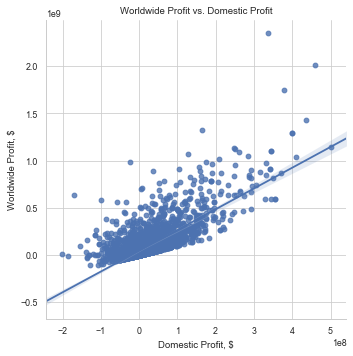

In [83]:
# What is the relationship between domestic profit and worldwide profit?

sns.lmplot(x='domestic_profit',y='worldwide_profit',data=total_df)
plt.xlabel('Domestic Profit, $')
plt.ylabel('Worldwide Profit, $')
sns.set_context('paper')
plt.title('Worldwide Profit vs. Domestic Profit')

Text(0.5, 1.0, 'Worldwide Profit vs. Genre')

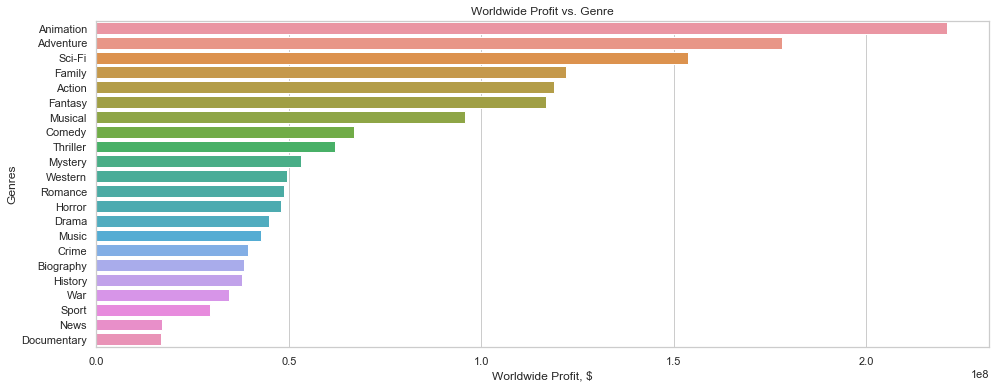

In [72]:
# Which genres generate the highest average worldwide profit?

plt.figure(figsize=(16,6))
sns.set(style="whitegrid")
ax = sns.barplot(y=filtered_genres_df.index, x="worldwide_profit", data=filtered_genres_df)
ax.set_xlabel('Worldwide Profit, $')
ax.set_ylabel('Genres')
plt.title('Worldwide Profit vs. Genre')

Text(0.5, 1.0, 'Worldwide Profit vs. Release Month')

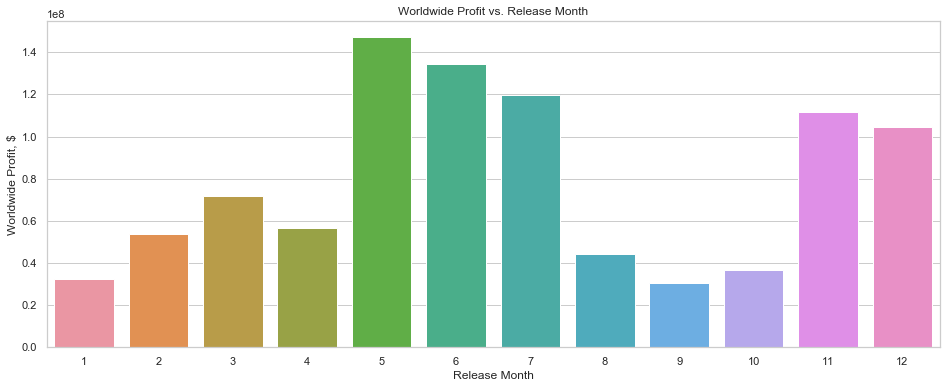

In [76]:
# Which months generate the highest average worldwide profit? 

# Bar plot 

plt.figure(figsize=(16,6))
sns.set(style="whitegrid")
ax = sns.barplot(x=top_months_df.index, y="worldwide_profit", data=top_months_df)
ax.set_xlabel('Release Month')
ax.set_ylabel('Worldwide Profit, $')
plt.title('Worldwide Profit vs. Release Month')

Text(0.5, 1.0, 'Worldwide Profit vs. Release Month')

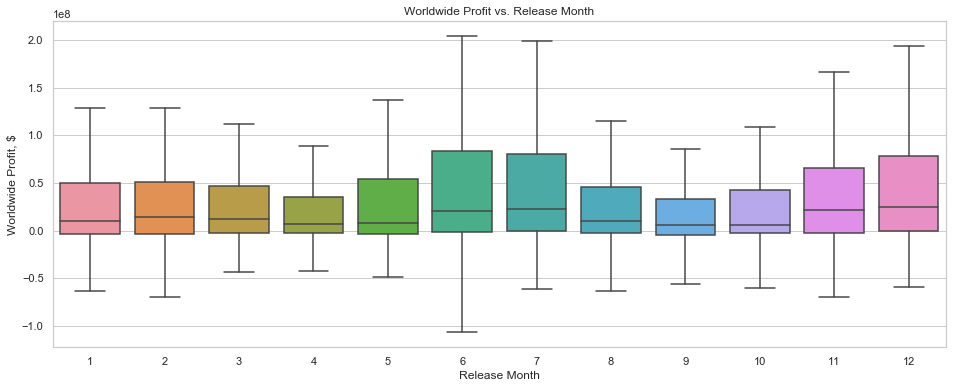

In [77]:
# Box Plot of IQR of average worldwide_profit vs release_month, with the outliers removed

plt.figure(figsize=(16,6))
Q1 = total_df['worldwide_profit'].quantile(0.25)
Q3 = total_df['worldwide_profit'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = (total_df['worldwide_profit'] >= Q1 - 1.5 * IQR) & (total_df['worldwide_profit'] <= Q3 + 1.5 *IQR)
total_df_filtered = total_df.loc[filtered_df] 
ax2 = sns.boxplot(x='release_month',y='worldwide_profit', data = total_df_filtered, showfliers=False) 
ax2.set_xlabel('Release Month')
ax2.set_ylabel('Worldwide Profit, $')
plt.title('Worldwide Profit vs. Release Month')

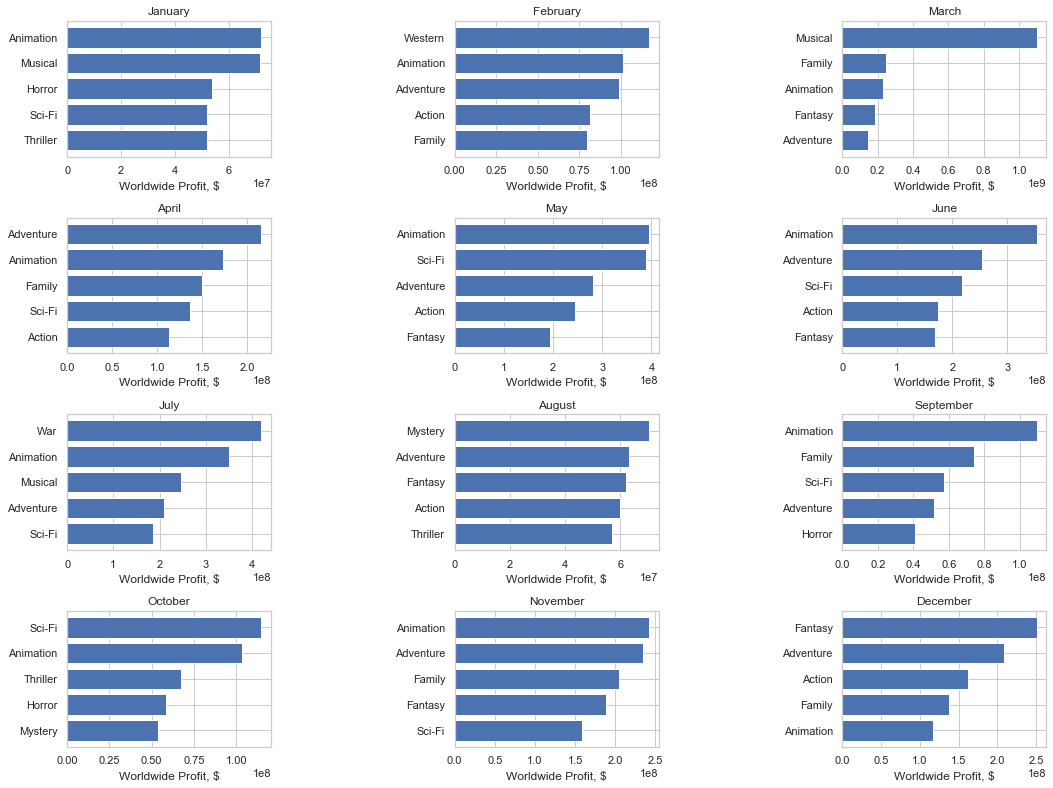

In [78]:
# The 5 genres that generate the highest worldwide profit depending on the month

# use dictionary of dataframes to create subplots:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for i, axe in enumerate(ax.flat):
    axe.barh(genres_months[months_ordered[i]]['genres'],
             genres_months[months_ordered[i]]['worldwide_profit'])
    axe.set_xlabel('Worldwide Profit, $')
    axe.set_title(months_ordered[i])
    axe.invert_yaxis()


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.9)
plt.show()

# Conclusions

## What is the relationship between domestic profit and worldwide profit?


According to the above line plot, there is a positive relationship between domestic profit and worldwide profit with a slope greater than 1.

## Which genres generate the highest worldwide profit?

According to the above bar plot, Worldwide Profit vs Genres, the five genres with the highest worldwide profit, in order, are: Animation, Adventure, Sci-Fi, Family, and Action.

## Which months generate the highest worldwide profit?

According to the above bar plot, Month vs Worldwide Profit, the five months that generate the highest worldwide profit, in order, are: May, June, July, November, and December.

## What are the top 5 profit genres for each month?



According to the bar graphs above, the 5 genres that generate the highest worldwide profits for each month are, in order:

January: Animation, Musical, Horror, Sci-Fi, and Thriller.

February: Western, Animation, Adventure, Action, and Family.

March: Musical, Family, Animation, Fantasty, and Adventure.

April: Adventure, Animation, Family, Sci-Fi, and Action.

May: Animation, Sci-Fi, Adventure, Action, and Fantasty.

June: Animation, Adventure, Sci-Fi, Action, and Fantasty.

July: War, Animation, Musical, Adventure, and Sci-Fi.

August: Mystery, Adventure, Fantasty, Action, and Thriller.

September: Animation, Family, Sci-Fi, Adventure, and Horror.

October: Sci-Fi, Animation, Thriller, Horror, and Mystery.

November: Animation, Adventure, Family, Fantasty, and Sci-Fi.

December: Fantasty, Adventure, Action, Family, and Animation.
